In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
# Wczytaj dane z pliku CSV
data = pd.read_csv('diabetes.csv')
data['class'] = data['class'].map({'tested_positive': 1, 'tested_negative': 0})

In [4]:
# Przygotuj dane
X = data.drop('class', axis=1).values
y = data['class'].values

In [5]:
# Podziel dane na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Zbuduj model
model = Sequential()
model.add(Dense(6, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# Skompiluj model
optimizer = Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Trenuj model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)

In [9]:
# Ewaluacja modelu
y_pred = model.predict(X_test).round()
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", confusion)

5/5 [==============================] - 0s 1ms/step
Accuracy:  0.6428571428571429
Confusion Matrix: 
 [[99  0]
 [55  0]]


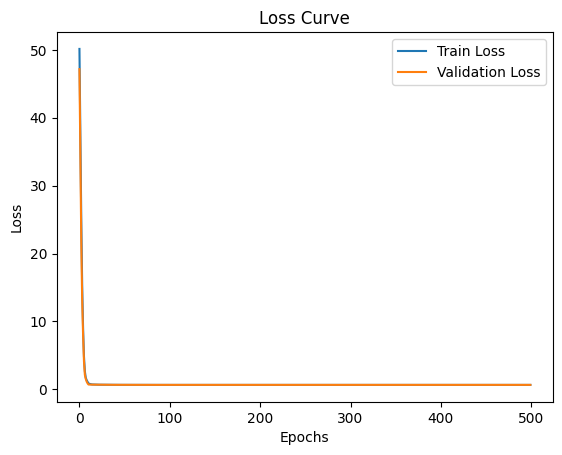

In [10]:
# Wykres krzywej błędu
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
#Jeśli chodzi o pytanie f), trenowanie powinno się przerwać w momencie, gdy krzywa błędu walidacji zaczyna wzrastać, podczas gdy krzywa błędu trenowania nadal maleje. Wskazuje to na przeuczenie. Jeśli obie krzywe błędu utrzymują się na wysokim poziomie, oznacza to niedouczenie.

#Aby przetestować różne optymalizatory i funkcje aktywacji (pytanie g), możesz zdefiniować listę optymalizatorów i funkcji aktywacji oraz iterować przez te listy, tworząc i trenując modele w każdej kombinacji. Następnie można porównać wykresy krzywych uczenia się dla różnych konfiguracji.